##Importamos todas las librerias que vamos a utilizar y cargamos el csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [2]:
imdb_data = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectIMDB/data/movie_metadata.csv")
imdb_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


###Vemos la estructura general del DataFrame y limpiamos los datos, eliminando duplicados y NaN

In [3]:
#Resumen de la estructura del df
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
imdb_data = imdb_data.dropna() #elimina toda la fila donde encuentre un NaN
imdb_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [5]:
# Verificar duplicados -----
duplicates = imdb_data[imdb_data.duplicated()]

# Imprimir las filas duplicadas
#print("Filas duplicadas:")
#print(duplicates)

#Contar el número total de filas duplicadas
num_duplicates = len(duplicates)
print(f"\nNúmero total de filas duplicadas: {num_duplicates}")


Número total de filas duplicadas: 33


In [6]:
#Eliminar filas duplicadas
movie_data_no_duplicates = imdb_data.drop_duplicates()

#Imprimir información sobre las filas duplicadas eliminadas
print(f"Número de filas antes de eliminar duplicados: {len(imdb_data)}")
print(f"Número de filas después de eliminar duplicados: {len(movie_data_no_duplicates)}")

Número de filas antes de eliminar duplicados: 3756
Número de filas después de eliminar duplicados: 3723


In [7]:
#Creo un nuevo df
movies = movie_data_no_duplicates
pd.set_option('display.max_columns', None)  #para que me muestre todas las columnas
movies.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


##Visualización

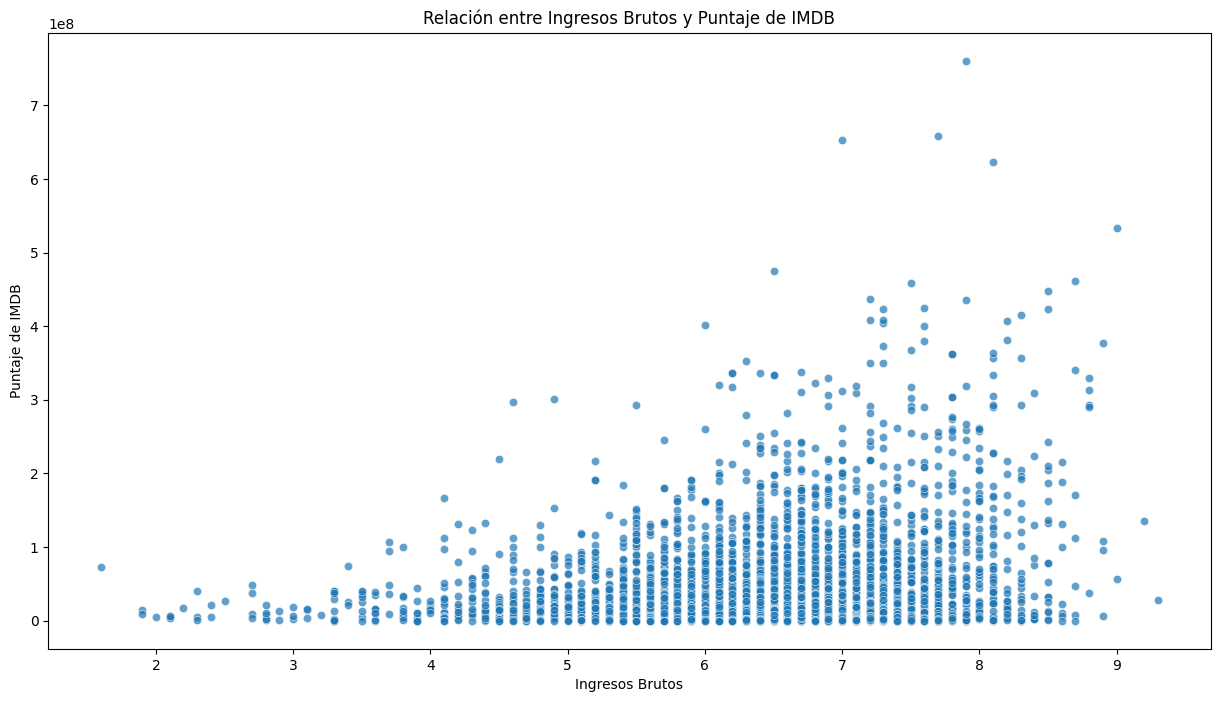

In [8]:
#Gráfico de dispersión
plt.figure(figsize=(15, 8))
sns.scatterplot(x='imdb_score', y='gross', data=movie_data_no_duplicates, alpha=0.7)
plt.title('Relación entre Ingresos Brutos y Puntaje de IMDB')
plt.xlabel('Ingresos Brutos')
plt.ylabel('Puntaje de IMDB')
plt.show()

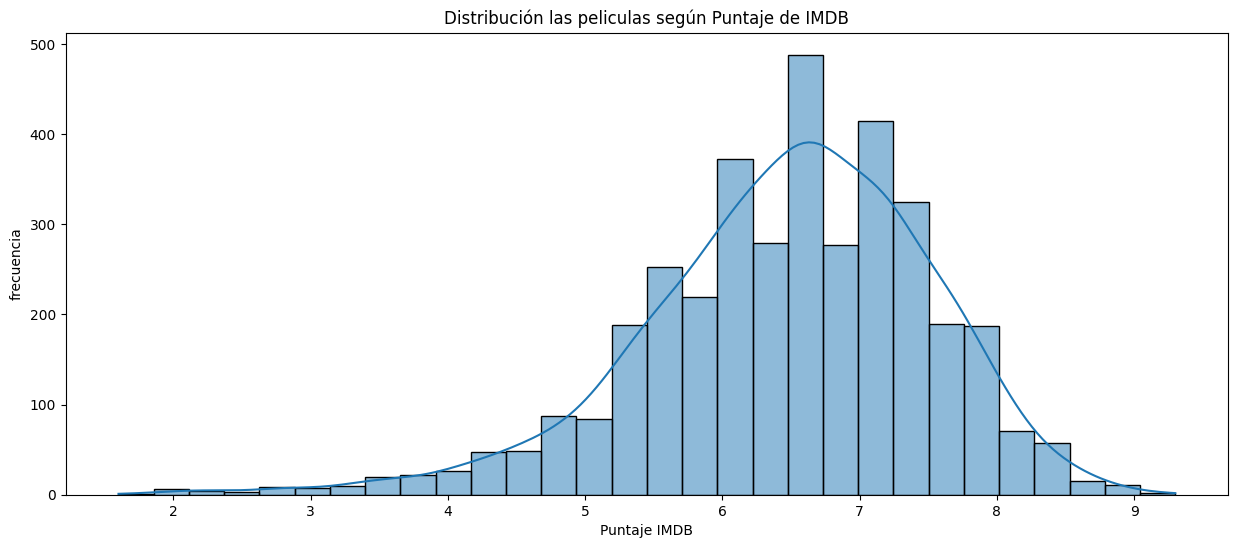

In [9]:
# Visualizar la distribución --- HISTOGRAMA
plt.figure(figsize=(15, 6))
sns.histplot(movie_data_no_duplicates['imdb_score'], bins=30, kde=True)
plt.title('Distribución las peliculas según Puntaje de IMDB')
plt.xlabel('Puntaje IMDB')
plt.ylabel('frecuencia')
plt.show()

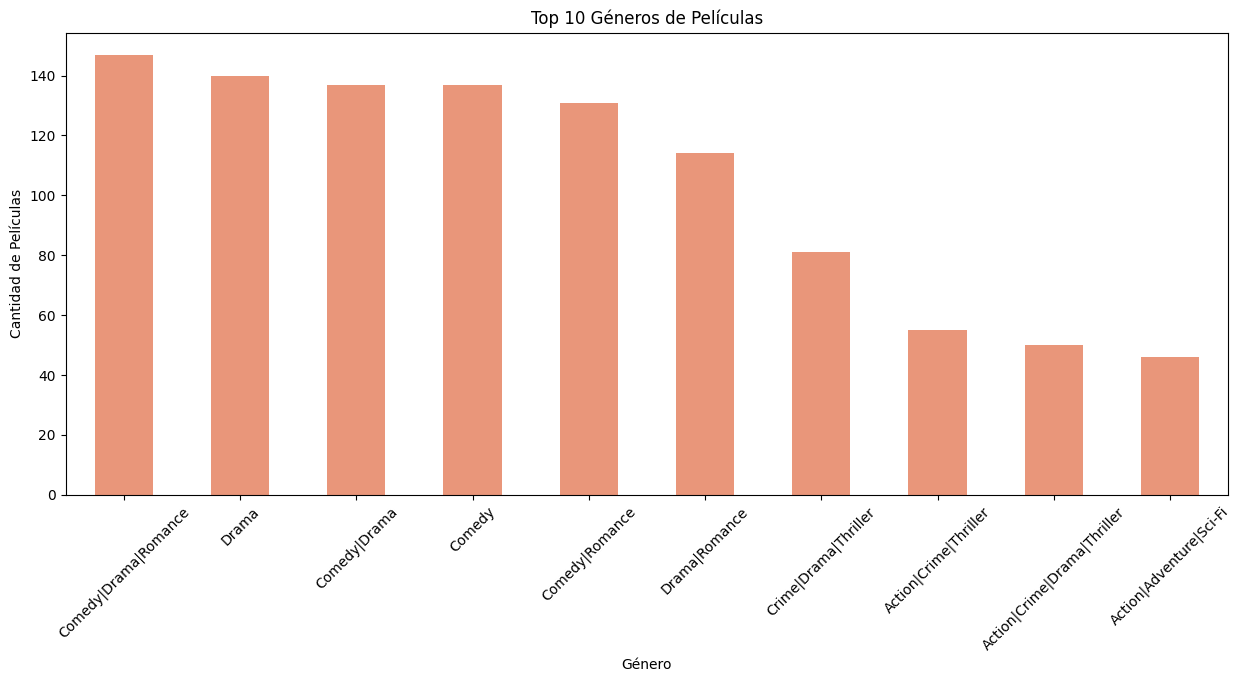

In [10]:
genero_count = movies['genres'].value_counts().head(10)  # Top 10 géneros más comunes

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
genero_count.plot(kind='bar', color= '#E9967A')
plt.title('Top 10 Géneros de Películas')
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x para una mejor legibilidad
plt.show()

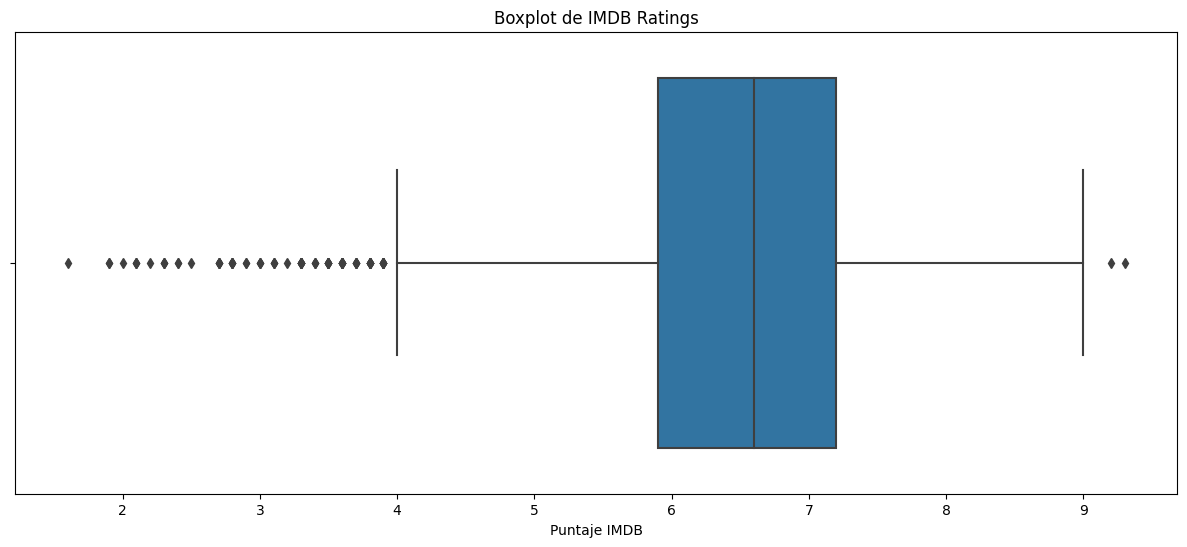

In [11]:
#Boxplot para identificar outliers en el puntaje de IMDB
plt.figure(figsize=(15, 6))
sns.boxplot(x=movie_data_no_duplicates['imdb_score'])
plt.title('Boxplot de IMDB Ratings')
plt.xlabel('Puntaje IMDB')
plt.show()

##Matriz de correlación de las variables
Los valores estarán en el rango de -1 a 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica que no hay correlación.


<ipython-input-12-e9265359ef09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = movies.corr()


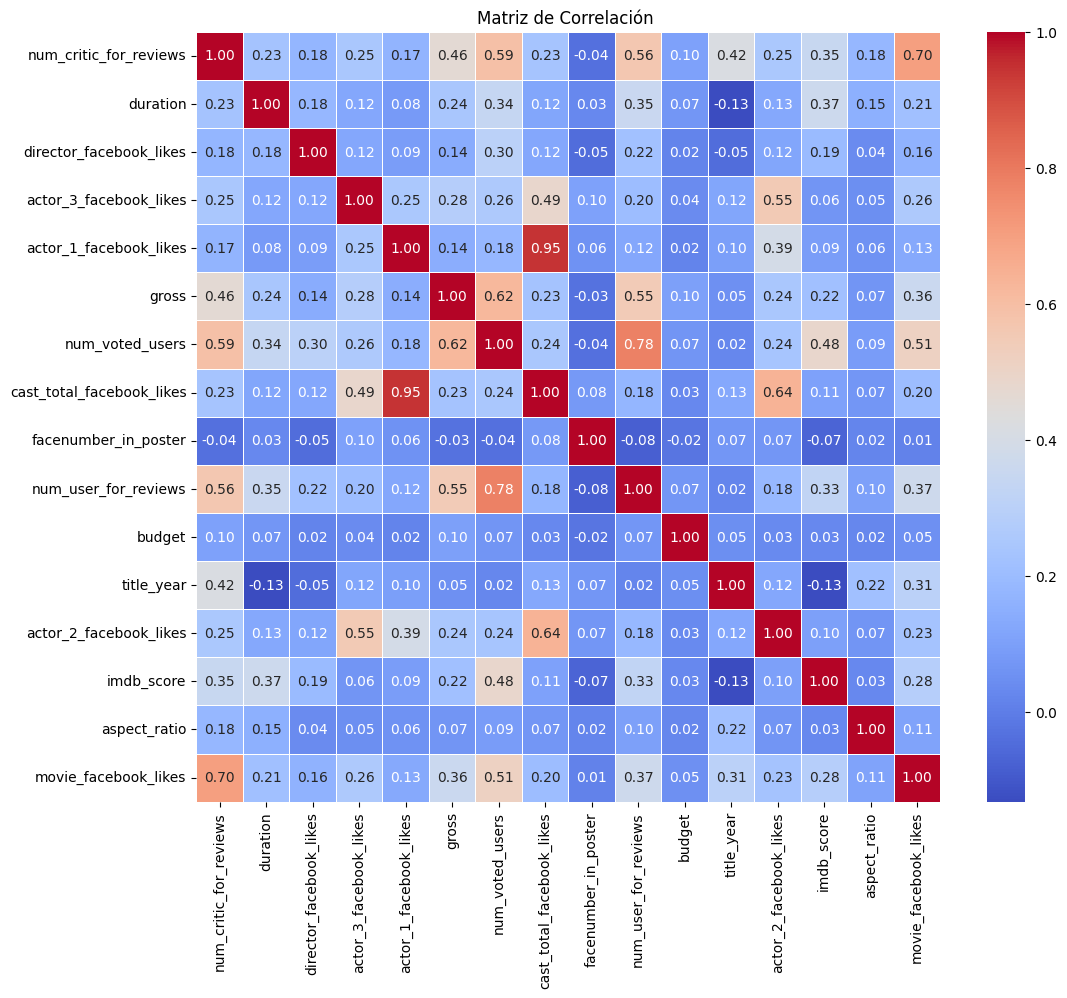

In [12]:
matriz_correlacion = movies.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación ')
plt.show()

In [13]:
#Seleccionar las características más correlacionadas con imdb_score
target_correlation = matriz_correlacion['imdb_score'].abs().sort_values(ascending=False)

#Mostrar las características más correlacionadas
selected_features_correlation = target_correlation[1:6]  # Seleccionar las 5 características más importantes
selected_features_correlation

num_voted_users           0.482583
duration                  0.367388
num_critic_for_reviews    0.349825
num_user_for_reviews      0.325026
movie_facebook_likes      0.284034
Name: imdb_score, dtype: float64

##Codificación One-Hot para variables categóricas o nominales
La idea es convertir una variable categórica en una representación binaria, donde cada categoría se representa como un vector de bits, y solo un bit es "encendido" (establecido en 1) para indicar la pertenencia a esa categoría.onvertir una variable categórica en una representación binaria, donde cada categoría se representa como un vector de bits, y solo un bit es "encendido" (establecido en 1) para indicar la pertenencia a esa categoría.

In [14]:
movie_data_encoded = pd.get_dummies(movies)

#Separar la variable objetivo 'imdb_score' de las características
X = movie_data_encoded.drop('imdb_score', axis=1)
y = movie_data_encoded['imdb_score']

#Inicializar un modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

#Ajustar el modelo y obtener la importancia de las características
rf_model.fit(X, y)
feature_importance = rf_model.feature_importances_

#Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

#Seleccionar las características más importantes (por ejemplo, las 5 más importantes)
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)['Feature'].tolist()

#Mostrar las características más importantes
print(top_features)

['num_voted_users', 'duration', 'budget', 'gross', 'num_user_for_reviews', 'num_critic_for_reviews', 'title_year', 'actor_3_facebook_likes', 'director_facebook_likes', 'actor_2_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes', 'actor_1_facebook_likes', 'content_rating_PG-13', 'facenumber_in_poster']


Ya que el caso que elegimos es un problema de regresion, dado que las etiquetas originales son valores continuos, que representan la puntuación IMDB, si queremos usar algunos modelos de clasificacion necesitaremos discretizar estas puntuaciones en categorías.

La conversión de las puntuaciones continuas en categorías como 'Bad', 'OK', 'Good', 'Excellent' es una forma de discretizar y simplificar el problema. A menudo, se realiza utilizando criterios como rangos de valores. Por ejemplo,
 se podría decidir que las películas con puntuaciones entre 0 y 4 son 'Bad', entre 4 y 6 son 'OK', entre 6 y 8 son 'Good', y por encima de 8 son 'Excellent'.

Al hacer esto, transformamos el problema de regresión (predecir una puntuación continua) en un problema de clasificación (predecir una categoría discreta). Los algoritmos de clasificación, como KNN y árboles de decisión, están más adaptados para trabajar con este tipo de problemas.

In [15]:
#Definir los límites para los buckets . Estos límites dividen el rango de valores posibles de la variable original en intervalos específicos.
bins = [0, 4, 6, 8, 10]

#Aignar a cada bucket una etiqueta
labels = ['Bad', 'OK', 'Good', 'Excellent']

#Crear la variable objetivo agrupada en buckets. y_grouped contendrá las etiquetas asociadas a cada valor de y según el bucket al que pertenezca
y_grouped = pd.cut(y, bins=bins, labels=labels)

#Mostrar las primeras filas de la variable objetivo agrupada
print(y_grouped.head())

0         Good
1         Good
2         Good
3    Excellent
5         Good
Name: imdb_score, dtype: category
Categories (4, object): ['Bad' < 'OK' < 'Good' < 'Excellent']


In [16]:
#divido el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Seleccionar solo las características más importantes
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

#Inicializar un modelo de bosque aleatorio con las características seleccionadas
model_selected = RandomForestRegressor(random_state=42)

#Entrenar el modelo en el conjunto de entrenamiento con características seleccionadas
model_selected.fit(X_train_selected, y_train)

#Realizar predicciones en el conjunto de prueba con características seleccionadas
y_pred_selected = model_selected.predict(X_test_selected)

#Evaluar el rendimiento del modelo con características seleccionadas
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f'Mean Squared Error (con características seleccionadas): {mse_selected}')
print(f'R^2 Score (con características seleccionadas): {r2_selected}')

Mean Squared Error (con características seleccionadas): 0.44689698523489935
R^2 Score (con características seleccionadas): 0.563774879863497


##Decision Tree Classifier

In [18]:
selected_features = ['num_voted_users', 'duration', 'budget', 'gross', 'num_user_for_reviews', 'num_critic_for_reviews', 'title_year', 'actor_3_facebook_likes', 'director_facebook_likes',
                     'actor_2_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes', 'actor_1_facebook_likes',  'facenumber_in_poster']

#Seleccionar solo las características relevantes y la variable objetivo agrupada
X_selected_grouped = X[selected_features]
X_train_selected_grouped, X_test_selected_grouped, y_train_grouped, y_test_grouped = train_test_split(X_selected_grouped, y_grouped, test_size=0.2, random_state=42)

#Inicializar el modelo de árbol de clasificación
dt_classifier_selected_grouped = DecisionTreeClassifier(random_state=42)

#Entrenar el modelo en el conjunto de entrenamiento
dt_classifier_selected_grouped.fit(X_train_selected_grouped, y_train_grouped)

#Realizar predicciones en el conjunto de prueba
y_pred_selected_grouped = dt_classifier_selected_grouped.predict(X_test_selected_grouped)

#Calcular la precisión del modelo
accuracy_selected_grouped = accuracy_score(y_test_grouped, y_pred_selected_grouped)
print(f'Accuracy: {accuracy_selected_grouped}')


Accuracy: 0.6604026845637584


In [19]:
#Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test_grouped, y_pred_selected_grouped)

#Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

#Obtener el reporte de clasificación
class_report = classification_report(y_test_grouped, y_pred_selected_grouped)

print("\nReporte de Clasificación:")
print(class_report)

Matriz de Confusión:
[[  4   0   2  10]
 [  0  16  12   0]
 [  8  16 368 100]
 [ 12   1  92 104]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         Bad       0.17      0.25      0.20        16
   Excellent       0.48      0.57      0.52        28
        Good       0.78      0.75      0.76       492
          OK       0.49      0.50      0.49       209

    accuracy                           0.66       745
   macro avg       0.48      0.52      0.49       745
weighted avg       0.67      0.66      0.67       745



##K Neighbors Classifier

In [20]:
#Inicializar el modelo KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)

#Entrenar el modelo en el conjunto de entrenamiento
knn_classifier.fit(X_train_selected_grouped, y_train_grouped)

#Realizar predicciones en el conjunto de prueba
y_pred_knn = knn_classifier.predict(X_test_selected_grouped)

#Calcular la precisión del modelo KNN
accuracy_knn = accuracy_score(y_test_grouped, y_pred_knn)
print(f'Accuracy KNN: {accuracy_knn}')

#Obtener la matriz de confusión para KNN
conf_matrix_knn = confusion_matrix(y_test_grouped, y_pred_knn)

#Mostrar la matriz de confusión para KNN
print("\nMatriz de Confusión para KNN:")
print(conf_matrix_knn)

#Obtener el reporte de clasificación para KNN
class_report_knn = classification_report(y_test_grouped, y_pred_knn)

print("\nReporte de Clasificación para KNN:")
print(class_report_knn)

Accuracy KNN: 0.6322147651006711

Matriz de Confusión para KNN:
[[  0   0  14   2]
 [  0   2  25   1]
 [  3   2 417  70]
 [  1   3 153  52]]

Reporte de Clasificación para KNN:
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        16
   Excellent       0.29      0.07      0.11        28
        Good       0.68      0.85      0.76       492
          OK       0.42      0.25      0.31       209

    accuracy                           0.63       745
   macro avg       0.35      0.29      0.30       745
weighted avg       0.58      0.63      0.59       745





---



Ademas de los modelos vistos durante el cursado de la carrera, indagamos sobre otros modelos adicionales que pudieran aplicarse a este trabajo, y encontramos el siguiente clasificador, que arrojo muy buenos resultados:

#Clasificador XGBoost

  XGBoost (Extreme Gradient Boosting) es un algoritmo de aprendizaje supervisado que se utiliza tanto para problemas de regresión como de clasificación. Es una implementación eficiente y altamente efectiva del algoritmo de aumento de gradiente.

In [21]:
pip install xgboost

In [22]:
selected_features = ['num_voted_users', 'duration', 'budget', 'gross', 'num_user_for_reviews', 'num_critic_for_reviews', 'title_year', 'actor_3_facebook_likes', 'director_facebook_likes',
                     'actor_2_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes', 'actor_1_facebook_likes', 'facenumber_in_poster']

#Seleccionar solo las características más importantes y la variable objetivo agrupada
X_selected_grouped = X[selected_features]
X_train_selected_grouped, X_test_selected_grouped, y_train_grouped, y_test_grouped = train_test_split(X_selected_grouped, y_grouped, test_size=0.2, random_state=42)

#Identificar columnas categóricas y numéricas
categorical_columns = []  # Excluimos 'content_rating_PG-13' deliberadamente
numeric_columns = X_selected_grouped.select_dtypes(exclude=['object']).columns

#Codificar las etiquetas categóricas en variables numéricas
label_encoder = LabelEncoder()
y_train_grouped_encoded = label_encoder.fit_transform(y_train_grouped)
y_test_grouped_encoded = label_encoder.transform(y_test_grouped)

#Crear transformador para variables categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', SimpleImputer(strategy='mean'), numeric_columns)
    ])

#Inicializar el modelo XGBoost
xgb_classifier = XGBClassifier()

#Crear el pipeline con el preprocesamiento y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_classifier)
])

#Entrenar el modelo en el conjunto de entrenamiento
pipeline.fit(X_train_selected_grouped, y_train_grouped_encoded)

#Realizar predicciones en el conjunto de prueba
y_pred_xgb_encoded = pipeline.predict(X_test_selected_grouped)

#Convertir las predicciones nuevamente a etiquetas originales
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

#Evaluar el rendimiento del modelo XGBoost
accuracy_xgb = accuracy_score(y_test_grouped, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_grouped, y_pred_xgb)
class_report_xgb = classification_report(y_test_grouped, y_pred_xgb)

#Mostrar resultados del modelo XGBoost
print(f'Accuracy XGBoost: {accuracy_xgb}')
print("\nMatriz de Confusión para XGBoost:")
print(conf_matrix_xgb)
print("\nReporte de Clasificación para XGBoost:")
print(class_report_xgb)

Accuracy XGBoost: 0.7946308724832215

Matriz de Confusión para XGBoost:
[[  0   0   2  14]
 [  0  16  12   0]
 [  0   5 449  38]
 [  1   0  81 127]]

Reporte de Clasificación para XGBoost:
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        16
   Excellent       0.76      0.57      0.65        28
        Good       0.83      0.91      0.87       492
          OK       0.71      0.61      0.65       209

    accuracy                           0.79       745
   macro avg       0.57      0.52      0.54       745
weighted avg       0.77      0.79      0.78       745



##Regresion Lineal

In [23]:
#Inicializar un modelo de regresión lineal
linear_model = LinearRegression()

#Entrenar el modelo en el conjunto de entrenamiento con todas las características
linear_model.fit(X_train, y_train)

#Realizar predicciones en el conjunto de prueba con todas las características
y_pred_linear = linear_model.predict(X_test)

#Evaluar el rendimiento del modelo de regresión lineal con todas las características
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Mean Squared Error (regresión lineal con todas las características): {mse_linear}')
print(f'R^2 Score (regresión lineal con todas las características): {r2_linear}')

#Obtener los coeficientes y la ordenada al origen
m = linear_model.coef_
c = linear_model.intercept_

print(f'Coeficientes asociados a cada variable independiente (normalizados): {m}')
print(f'Ordenada al origen (normalizada): {c}')


Mean Squared Error (regresión lineal con todas las características): 0.59475669559003
R^2 Score (regresión lineal con todas las características): 0.4194460478416997
Coeficientes asociados a cada variable independiente (normalizados): [3.15695539e-03 8.15464572e-03 1.83253979e-05 ... 2.15625822e-01
 3.51656375e-02 1.34000011e-01]
Ordenada al origen (normalizada): 71.37379020395466


In [24]:
Y_pred_train = m * X_train + c
Y_pred_train1 = linear_model.predict(X_train)
Y_pred_train1


array([6.79999929, 6.09999489, 5.99999447, ..., 5.70001086, 7.19999106,
       4.89999656])

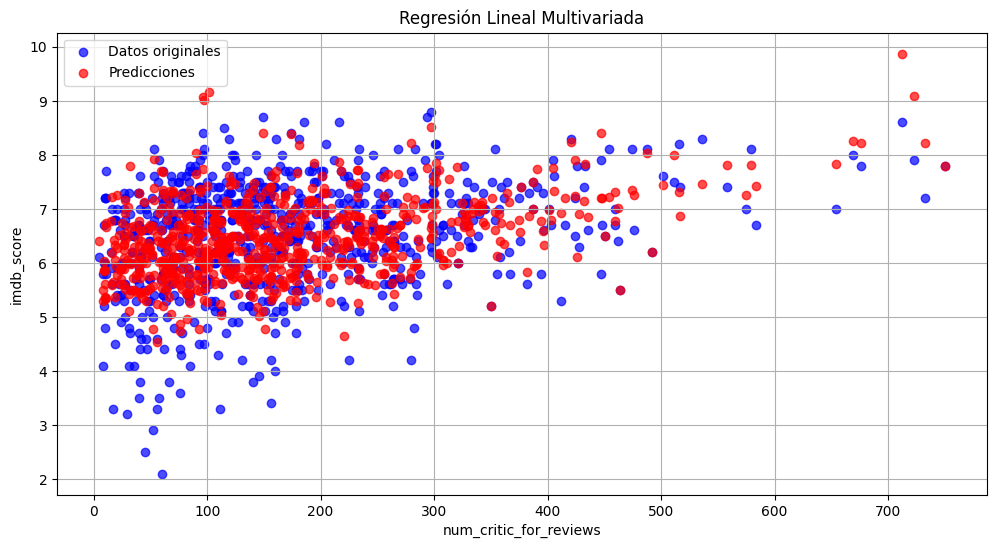

In [25]:
#Graficar los puntos originales y las predicciones
plt.figure(figsize=(12, 6))
plt.scatter(X_test['num_critic_for_reviews'], y_test, label='Datos originales', color='blue', alpha=0.7)
plt.scatter(X_test['num_critic_for_reviews'], y_pred_linear, label='Predicciones', color='red', alpha=0.7)
plt.title('Regresión Lineal Multivariada')
plt.xlabel('num_critic_for_reviews')
plt.ylabel('imdb_score')
plt.legend()
plt.grid()
plt.show()

##Random Forest Regression

In [26]:
#Inicializar un modelo de bosque aleatorio para regresión
rf_regressor = RandomForestRegressor(random_state=42)

#Entrenar el modelo en el conjunto de entrenamiento completo
rf_regressor.fit(X_train, y_train)

#Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_regressor.predict(X_test)

#Evaluar el rendimiento del modelo de bosque aleatorio para regresión
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest para regresión): {mse_rf}')
print(f'R^2 Score (Random Forest para regresión): {r2_rf}')


Mean Squared Error (Random Forest para regresión): 0.4335573597315436
R^2 Score (Random Forest para regresión): 0.5767959561518472


In [27]:
# Obtener importancia de características
feature_importances = rf_regressor.feature_importances_
feature_importances

array([3.44789673e-02, 1.02702029e-01, 2.49842954e-02, ...,
       3.15390454e-03, 4.09874908e-05, 3.26946334e-05])

In [28]:
#Obtener importancia de características
feature_importances = rf_regressor.feature_importances_

#Crear una lista de tuplas (característica, importancia)
feature_importance_tuples = list(zip(X_train.columns, feature_importances))

#Ordenar la lista por importancia en orden descendente
feature_importance_tuples_sorted = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

top_features = feature_importance_tuples_sorted[:3]

print("Las 3 características más importantes:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")


Las 3 características más importantes:
num_voted_users: 0.3262118246366856
budget: 0.10367079733242494
duration: 0.10270202894662403


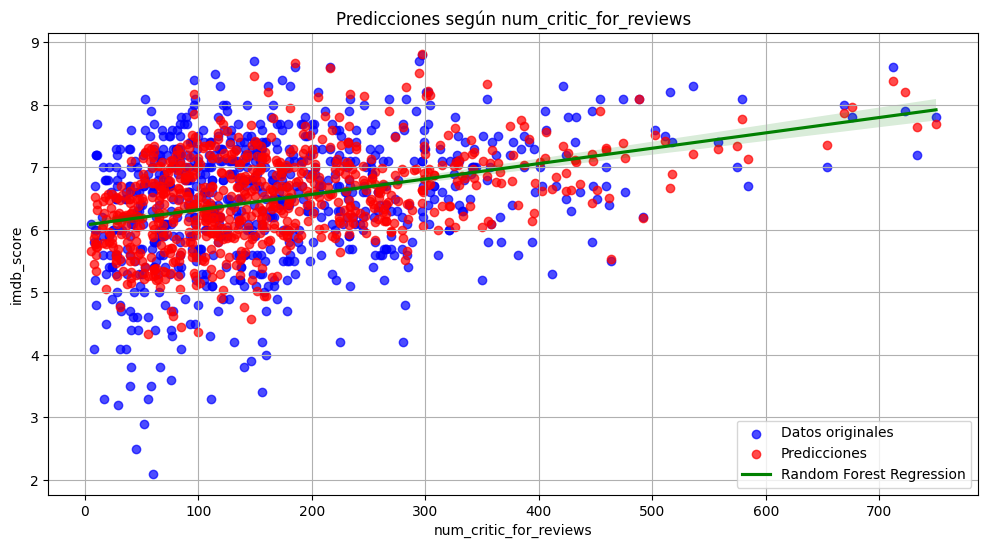

In [29]:
#Graficar los puntos originales y las predicciones según la variable num_critic_for_reviews, que es la que mas influye en el modelo
plt.figure(figsize=(12, 6))
plt.scatter(X_test['num_critic_for_reviews'], y_test, label='Datos originales', color='blue', alpha=0.7)
plt.scatter(X_test['num_critic_for_reviews'], y_pred_rf, label='Predicciones', color='red', alpha=0.7)
# Agregar la línea de regresión
sns.regplot(x=X_test['num_critic_for_reviews'], y=y_pred_rf, scatter=False, color='green', label='Random Forest Regression')
plt.title('Predicciones según num_critic_for_reviews')
plt.xlabel('num_critic_for_reviews')
plt.ylabel('imdb_score')
plt.legend()
plt.grid()
plt.show()

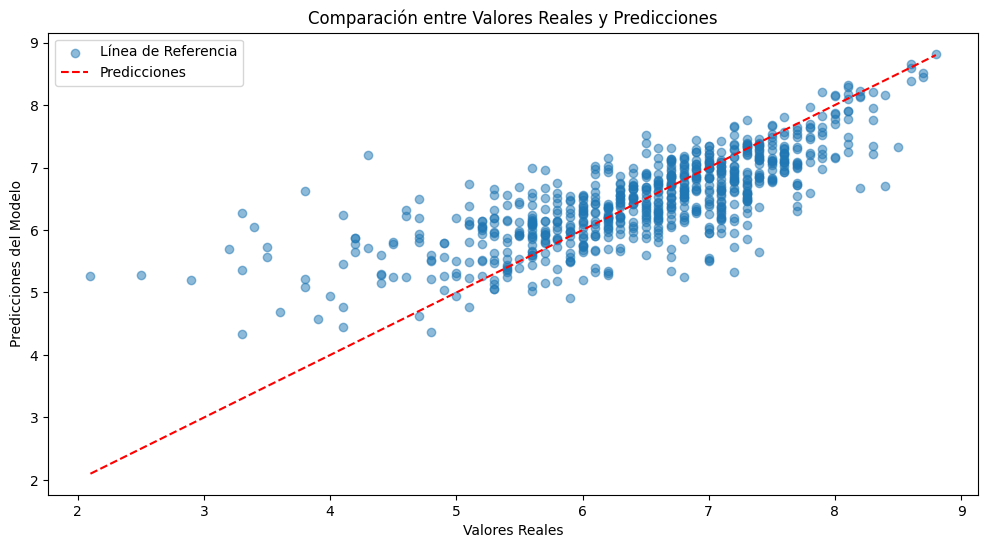

In [30]:
#Graficar los valores reales frente a las predicciones con todas las caracteristicas
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)

# Graficar la línea de referencia (y = x)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar la leyenda
plt.legend(['Línea de Referencia', 'Predicciones'], loc='upper left')
plt.show()
